# Diabetes prediction problem

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

There is no NA values in this dataset. For `smoking_history` variable there is cateogory that defines if there is informations about pacient smoking history. We will first get a view of categorical variables in this dataset.

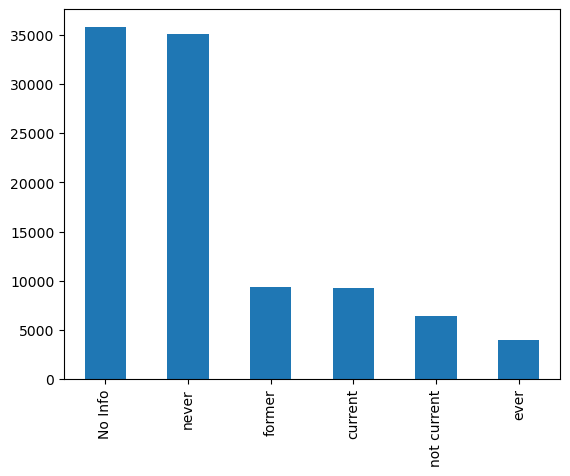

In [5]:
df.smoking_history.value_counts().plot(kind='bar')
plt.show()

In [6]:
from scipy.stats import chi2_contingency
ops = pd.crosstab(df.diabetes, df.smoking_history)
chi, p, dof, ex = chi2_contingency(ops)
p

0.0

We can see that there is a lot of people from whom we did not get the information about smoking habits. Because of that we will leave that category in variable. We can consider grouping other categories that are not so frequent, but for now we will leave this variable as it is. Also we have checked is there correlation between output and this variable with chi2 test and results are saying that there is significant correlation between those two.

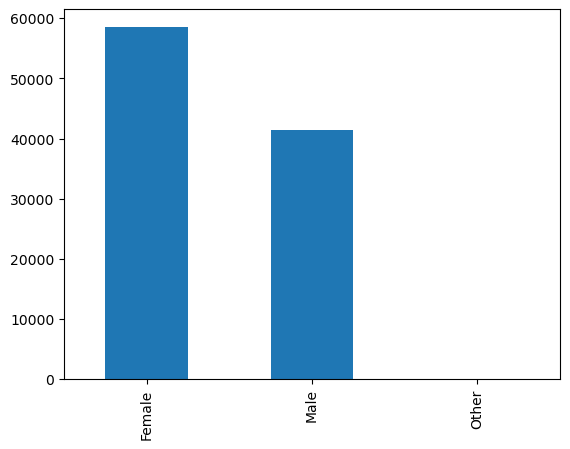

In [7]:
df.gender.value_counts().plot(kind='bar')
plt.show()

From the bar chart we can se that there is more females than males. Also we can see that there exist other category, supposedly a error in data gathering. We will fix that issue.

In [8]:
df.gender.value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [9]:
df.groupby('gender').mean(numeric_only=True)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,,,,,,,
Female,42.463291,0.071680,0.026677,27.449287,5.509477,137.468951,0.076189
Male,41.075139,0.079363,0.057446,27.139108,5.553041,138.890031,0.097490
Other,29.555556,0.000000,0.000000,27.379444,5.405556,139.444444,0.000000


In [10]:
pd.crosstab(df.gender, df.smoking_history)

smoking_history,No Info,current,ever,former,never,not current
gender,,,,,,
Female,19700,5058,2238,4774,22869,3913
Male,16110,4228,1765,4578,12223,2526
Other,6,0,1,0,3,8


Because the lack of correlation between `gender` and other variables, we can not fix by this values by hand. Beacuse there is only 18 `Other` values, we will set them to most frequent cateogory, `Female`.

In [11]:
df.loc[df.gender=='Other', 'gender']='Female'

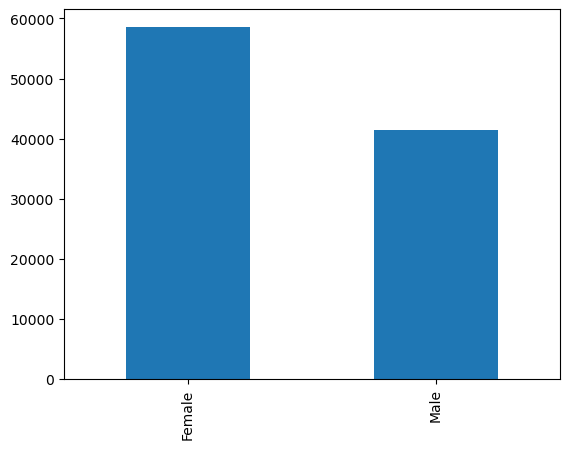

In [12]:
df.gender.value_counts().plot(kind='bar')
plt.show()

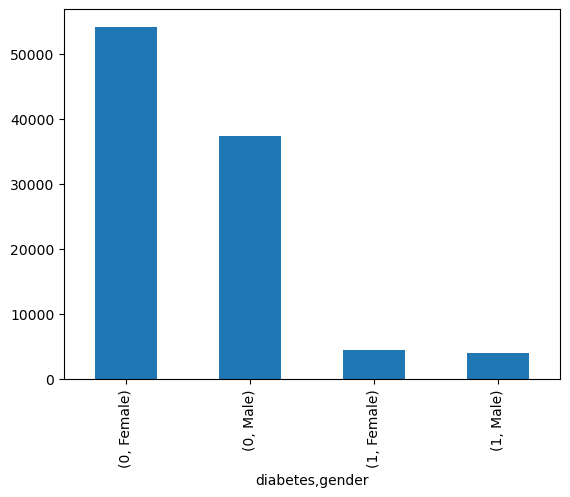

In [13]:
df.groupby('diabetes')['gender'].value_counts().plot(kind='bar')
plt.show()

In [14]:
from scipy.stats import chi2_contingency
ops = pd.crosstab(df.diabetes, df.gender)
chi, p, dof, ex = chi2_contingency(ops)
p

1.188732885582169e-32

We have also used chi2 test to find out if there is correlation between output and these variable, and there surley is. After finishing review of categorical data we can proceed on analysing numerical data. Because there is binary values and ordinary numerical values, we will have two separate analysis. First we will see what is happening with

In [15]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


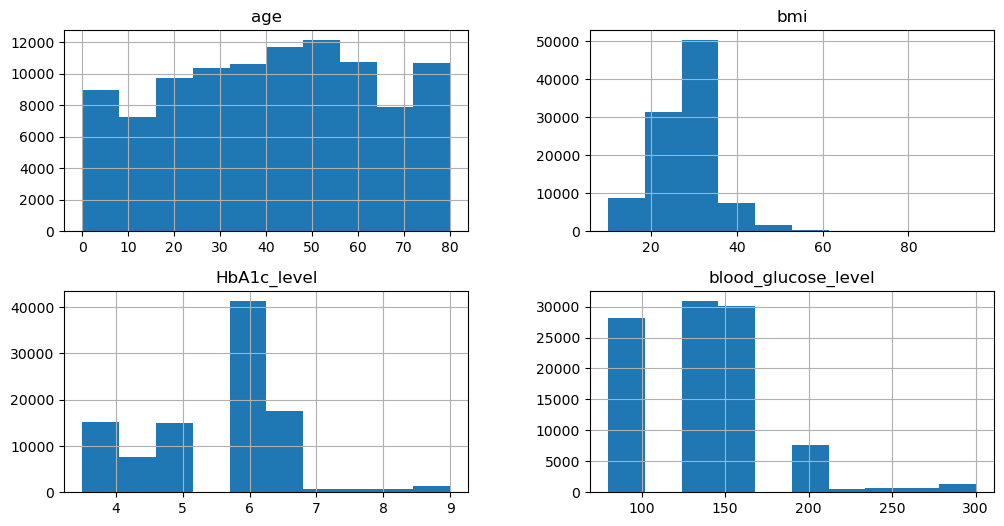

In [16]:
df[['age','bmi','HbA1c_level','blood_glucose_level']].hist(figsize=(12,6))
plt.show()

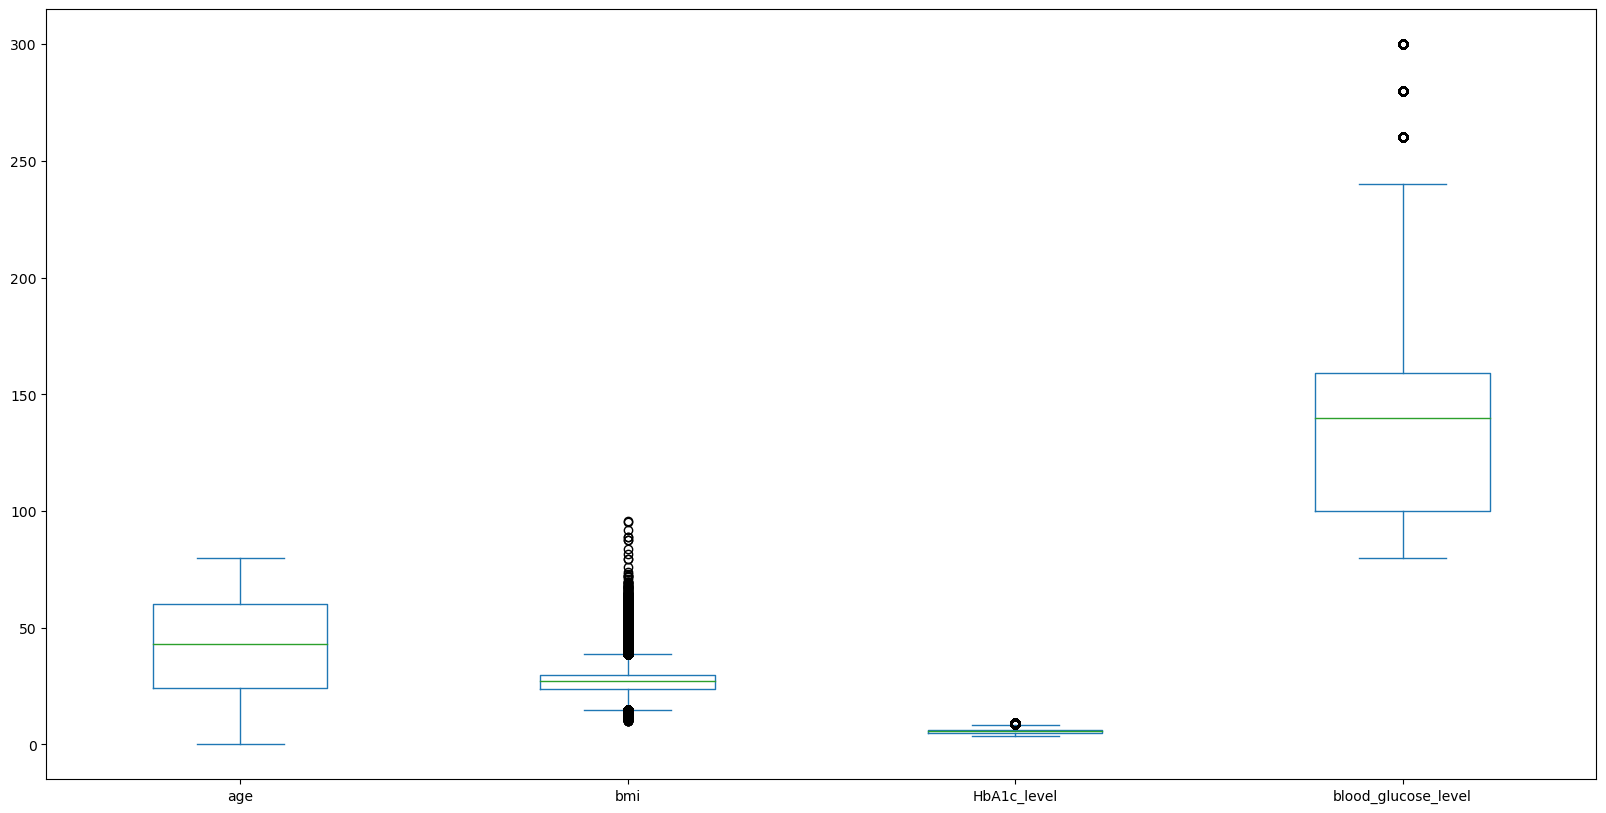

In [17]:
df[['age','bmi','HbA1c_level','blood_glucose_level']].plot(kind='box', figsize=(20,10))
plt.show()

First thing that we can see is that variable bmi has many outliers. We will leave them for now, becuase we must consider a multivariable outlier analysis later. Other variables have normal results, some of which have few outliers, but nothing strange. We can continue analysing binary variables.

In [18]:
df.diabetes.value_counts(normalize=True)

0    0.915
1    0.085
Name: diabetes, dtype: float64

In [19]:
df.hypertension.value_counts(normalize=True)

0    0.92515
1    0.07485
Name: hypertension, dtype: float64

In [20]:
df.heart_disease.value_counts(normalize=True)

0    0.96058
1    0.03942
Name: heart_disease, dtype: float64

In [21]:
pd.crosstab(index=df.diabetes, columns=df.hypertension, normalize='columns')

hypertension,0,1
diabetes,,
0,0.930692,0.721042
1,0.069308,0.278958


In [22]:
from scipy.stats import pearsonr
r, p = pearsonr(df.diabetes, df.heart_disease)
print(f'Coef. correlation: {r}, p-value: {p}')

Coef. correlation: 0.1717268495488512, p-value: 0.0


In [23]:
r, p = pearsonr(df.diabetes, df.hypertension)
print(f'Coef. correlation: {r}, p-value: {p}')

Coef. correlation: 0.1978232464080518, p-value: 0.0


First of all we can see that we have huge class imbalance in this dataset, where only 5% of the people have diabetes. So we can say that accuracy for this classification problem will not be useful for evaulation. Also we can see that there is correlation between output and input binary variables with pearson correlation coeffietient. This is important because we can see that this variables have high impact on output.
Next stage is transforming cateogorical into numerical data.

In [24]:
df.gender=df.gender.apply(lambda x: 1 if x == 'Female' else 0)

In [25]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
ohe=encoder.fit_transform(df[['smoking_history']]).toarray()
labels=encoder.categories_
feat_labels=np.concatenate(labels)
ohc_df=pd.DataFrame(data=ohe, columns=feat_labels)
ohc_df

,No Info,current,ever,former,never,not current
0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
99995,1.0,0.0,0.0,0.0,0.0,0.0
99996,1.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,1.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
df=pd.concat([df, ohc_df], axis=1)
df=df.drop('smoking_history', axis=1)
df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,No Info,current,ever,former,never,not current
0,1,80.0,0,1,25.19,6.6,140,0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,54.0,0,0,27.32,6.6,80,0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,28.0,0,0,27.32,5.7,158,0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,36.0,0,0,23.45,5.0,155,0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,76.0,1,1,20.14,4.8,155,0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,80.0,0,0,27.32,6.2,90,0,1.0,0.0,0.0,0.0,0.0,0.0
99996,1,2.0,0,0,17.37,6.5,100,0,1.0,0.0,0.0,0.0,0.0,0.0
99997,0,66.0,0,0,27.83,5.7,155,0,0.0,0.0,0.0,1.0,0.0,0.0
99998,1,24.0,0,0,35.42,4.0,100,0,0.0,0.0,0.0,0.0,1.0,0.0


Because `gender` was binary categorical variable we used binary conversion, where `Female` now have value 1, and `Male` now have value 0. For `smoking_history` variable we have used **OneHotEncoder** and made 5 new columns, for each unique value of this variable. Last thing to do for preprocessing data is to normalize it. 

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
np_norm=scaler.fit_transform(df)
df_norm=pd.DataFrame(data=np_norm, columns=df.columns)
df_norm

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,No Info,current,ever,former,never,not current
0,1.0,1.000000,0.0,1.0,0.177171,0.563636,0.272727,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.674675,0.0,0.0,0.202031,0.563636,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.349349,0.0,0.0,0.202031,0.400000,0.354545,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.449449,0.0,0.0,0.156863,0.272727,0.340909,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.949950,1.0,1.0,0.118231,0.236364,0.340909,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.0,1.000000,0.0,0.0,0.202031,0.490909,0.045455,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99996,1.0,0.024024,0.0,0.0,0.085901,0.545455,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.824825,0.0,0.0,0.207983,0.400000,0.340909,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99998,1.0,0.299299,0.0,0.0,0.296569,0.090909,0.090909,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Because there is a lot of columns that is made from **OneHotEncoder**, for normalization we used **MinMaxScaler**. Our preprocessing is finished and we can now focus on anolmaly detection. Before that we need to separate train and test set for further modeling.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_norm.drop('diabetes', axis=1), df_norm.diabetes, test_size=0.2, random_state=13)

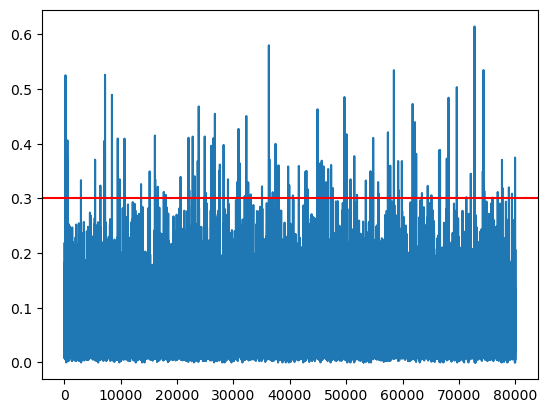

In [29]:
from sklearn.neighbors import NearestNeighbors
out = NearestNeighbors()
out.fit(X_train)
distances, indexes = out.kneighbors()
plt.plot(distances.mean(axis=1))
plt.axhline(0.3, color = 'r')
plt.show()

In [30]:
X_train=X_train.reset_index()
y_train=y_train.reset_index()
X_train=X_train.drop('index', axis=1)
y_train=y_train.drop('index', axis=1)
outlier_index = np.where(distances.mean(axis=1)>0.3)
X_train_noout=X_train.drop(outlier_index[0])
y_train_noout = y_train.drop(outlier_index[0])

We have now made new dataset which involves data without outliers based on **KNN** model. We will use both in future analysis so we can see how does models work on both of them but also we will use feature engineering and selection to make one more dataset. For feature engineering we will be using **PolynomialFeatures**.

In [31]:
from sklearn.preprocessing import PolynomialFeatures
df_newfeat = df_norm.drop('diabetes', axis=1).copy()
poly=PolynomialFeatures(degree=2)
np_poly=poly.fit_transform(df_newfeat)
df_poly=pd.DataFrame(data=np_poly, columns=poly.get_feature_names_out())
df_poly['diabetes']=df_norm.diabetes
df_poly

,1,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,No Info,current,...,ever former,ever never,ever not current,former^2,former never,former not current,never^2,never not current,not current^2,diabetes
0,1.0,1.0,1.000000,0.0,1.0,0.177171,0.563636,0.272727,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,0.674675,0.0,0.0,0.202031,0.563636,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.349349,0.0,0.0,0.202031,0.400000,0.354545,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,0.449449,0.0,0.0,0.156863,0.272727,0.340909,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.949950,1.0,1.0,0.118231,0.236364,0.340909,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.0,1.0,1.000000,0.0,0.0,0.202031,0.490909,0.045455,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,1.0,1.0,0.024024,0.0,0.0,0.085901,0.545455,0.090909,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,1.0,0.0,0.824825,0.0,0.0,0.207983,0.400000,0.340909,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,1.0,1.0,0.299299,0.0,0.0,0.296569,0.090909,0.090909,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(df_poly.drop('diabetes', axis=1), df_poly.diabetes, test_size=0.2, random_state=13)

After we have made new features, we need to use feature selection tools so we can select only the most important columns from dataset and dodge a overfit problem. For feature selection we will use VarianceThreshold with 0.7 probability.

In [33]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(0.05))
selection.fit(pd.concat([X_train_poly, y_train_poly], axis=1))
labels=selection.get_support()
df_sel_train=pd.concat([X_train_poly, y_train_poly], axis=1).loc[:,labels]
df_sel_test=pd.concat([X_test_poly, y_test_poly], axis=1).loc[:,labels]
X_train_sel = df_sel_train.drop('diabetes', axis=1)
X_test_sel = df_sel_test.drop('diabetes', axis=1)
y_train_sel = df_sel_train.diabetes
y_test_sel = df_sel_test.diabetes

Now we have total of 4 datasets that we will going to use: starter set, no outlier set, polynomial feature created set and feature selected set. For every one of this sets we will make models. Now its modeling time, where we will first make pipline for modeling, and then start creating models. We will use 3 main algorithms for this problem, DescisionTree, KNearestNeighbros, LogisticRegression and one boosting algorithm, GradientBoost. For every of the sets we will be using hyperparameters optimization using GridSearchCV method. Because classification accuracy is not great metric for this problem, every descision is basen on maximizing recall and auc metrics.

In [34]:
resultsTree = pd.DataFrame()
resultsKNN = pd.DataFrame()
resultsLogistic = pd.DataFrame()
resultsBoost = pd.DataFrame()

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, roc_auc_score
def evaulation(y, y_hat,):
    ConfusionMatrixDisplay(confusion_matrix(y, y_hat), display_labels=[False, True]).plot()
    plt.show()
    print(f'Recall: {recall_score(y, y_hat)}')
    print(f'Precision: {precision_score(y, y_hat)}')
def auc_print(y, y_hat_probs):
    print(f'AUC score: {roc_auc_score(y, y_hat_probs)}')

In [36]:
def resultsDataFrame(y, y_hat, y_hat_prob, column_name):
        return pd.DataFrame({f'{column_name}' : [round(roc_auc_score(y, y_hat_prob), 4), round(precision_score(y, y_hat), 4), round(recall_score(y, y_hat), 4)]}, index=['AUC', 'Precision', 'Recall'])

In [37]:
gridTree = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid={'min_samples_leaf' : [2,3,4,5,6], 'max_depth' : [2,3,4,5,6], 'min_samples_split' : [2,3,4,5,6]}, cv=3, scoring='roc_auc')
gridKNN = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors' : [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]}, cv=5, scoring='roc_auc')
gridLogistic = GridSearchCV(estimator=LogisticRegression(), param_grid={'C' : [0.01,0.05, 0.1, 0.2, 0.3, 0.5, 0.8, 1, 2, 5, 10]}, cv=5, scoring='roc_auc')
gridBoost = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid={'learning_rate' : [0.05, 0.1, 0.2, 0.5, 1], 'n_estimators': [30,50,70,100]} ,cv=3, scoring='roc_auc')

We have created GridSerachCV for every algorithm we will use. Now we will fit this grid into datasets and create models one by one.

## Basic dataset

In [38]:
gridTree.fit(X_train, y_train)
print(gridTree.best_params_)

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}


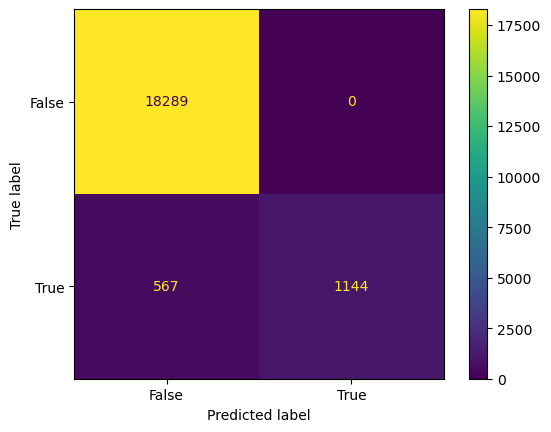

Recall: 0.668614845119813
Precision: 1.0
AUC score: 0.9618451769193486


In [39]:
model_tree1 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=2,min_samples_split=2).fit(X_train, y_train)
evaulation(y_test, model_tree1.predict(X_test))
auc_print(y_test, model_tree1.predict_proba(X_test)[:,1])
resultsTree=pd.concat([resultsTree, resultsDataFrame(y_test,model_tree1.predict(X_test), model_tree1.predict_proba(X_test)[:,1], 'Basic')], axis=1)

In [40]:
gridKNN.fit(X_train, y_train)
print(gridKNN.best_params_)

{'n_neighbors': 31}


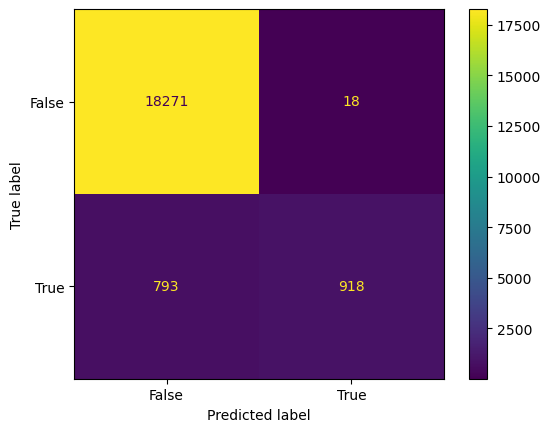

Recall: 0.5365283459964932
Precision: 0.9807692307692307
AUC score: 0.9531129029438672


In [41]:
model_knn1 = KNeighborsClassifier(n_neighbors=31).fit(X_train_noout, y_train_noout)
evaulation(y_test, model_knn1.predict(X_test))
auc_print(y_test, model_knn1.predict_proba(X_test)[:,1])
resultsKNN=pd.concat([resultsKNN, resultsDataFrame(y_test,model_tree1.predict(X_test), model_tree1.predict_proba(X_test)[:,1], 'Basic')], axis=1)

In [42]:
gridLogistic.fit(X_train, y_train)
print(gridLogistic.best_params_)

{'C': 0.8}


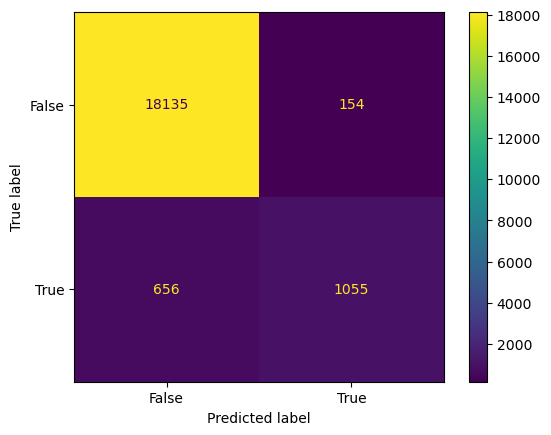

Recall: 0.6165984804208066
Precision: 0.8726220016542597
AUC score: 0.9608418367876832


In [43]:
model_log1 = LogisticRegression(C=0.8).fit(X_train_noout, y_train_noout)
evaulation(y_test, model_log1.predict(X_test))
auc_print(y_test, model_log1.predict_proba(X_test)[:,1])
resultsLogistic=pd.concat([resultsLogistic, resultsDataFrame(y_test,model_tree1.predict(X_test), model_tree1.predict_proba(X_test)[:,1], 'Basic')], axis=1)

In [44]:
gridBoost.fit(X_train, y_train)
print(gridBoost.best_params_)

{'learning_rate': 0.2, 'n_estimators': 100}


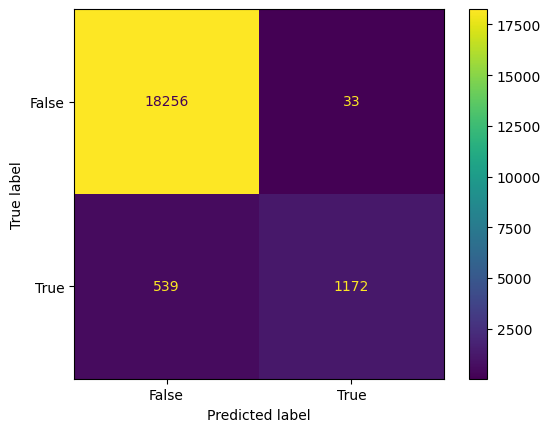

Recall: 0.684979544126242
Precision: 0.9726141078838174
AUC score: 0.9783478643542431


In [45]:
model_boost1 = GradientBoostingClassifier(learning_rate=0.2, n_estimators=100).fit(X_train_noout, y_train_noout)
evaulation(y_test, model_boost1.predict(X_test))
auc_print(y_test, model_boost1.predict_proba(X_test)[:,1])
resultsBoost=pd.concat([resultsBoost, resultsDataFrame(y_test,model_tree1.predict(X_test), model_tree1.predict_proba(X_test)[:,1], 'Basic')], axis=1)

## No outlier dataset

In [46]:
gridTree.fit(X_train_noout, y_train_noout)
print(gridTree.best_params_)

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}


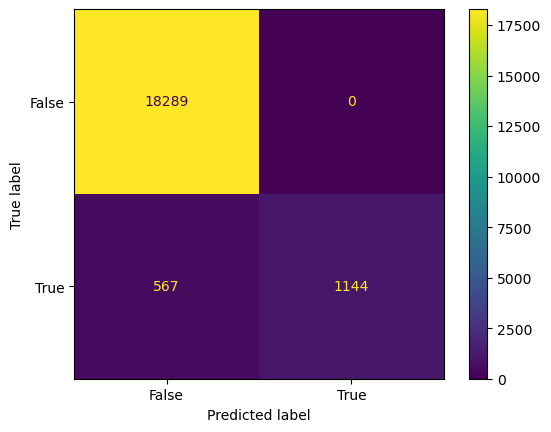

Recall: 0.668614845119813
Precision: 1.0
AUC score: 0.9619258512564632


In [47]:
model_tree2 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=2,min_samples_split=2).fit(X_train_noout, y_train_noout)
evaulation(y_test, model_tree2.predict(X_test))
auc_print(y_test, model_tree2.predict_proba(X_test)[:,1])
resultsTree=pd.concat([resultsTree, resultsDataFrame(y_test,model_tree2.predict(X_test), model_tree2.predict_proba(X_test)[:,1], 'No out')], axis=1)

In [48]:
gridKNN.fit(X_train_noout, y_train_noout)
print(gridKNN.best_params_)

{'n_neighbors': 31}


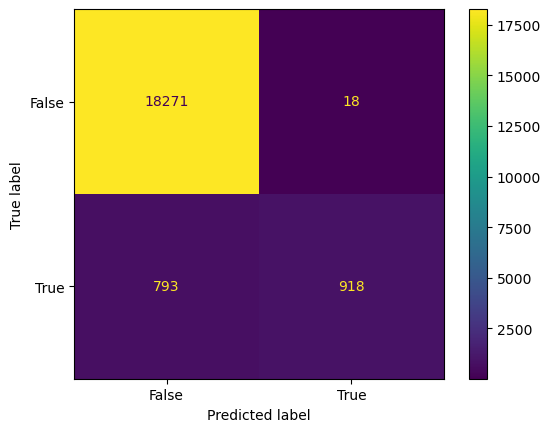

Recall: 0.5365283459964932
Precision: 0.9807692307692307
AUC score: 0.9531129029438672


In [49]:
model_knn2 = KNeighborsClassifier(n_neighbors=31).fit(X_train_noout, y_train_noout)
evaulation(y_test, model_knn2.predict(X_test))
auc_print(y_test, model_knn2.predict_proba(X_test)[:,1])
resultsKNN=pd.concat([resultsKNN, resultsDataFrame(y_test,model_knn2.predict(X_test), model_knn2.predict_proba(X_test)[:,1], 'No out')], axis=1)

In [50]:
gridLogistic.fit(X_train_noout, y_train_noout)
print(gridLogistic.best_params_)

{'C': 0.8}


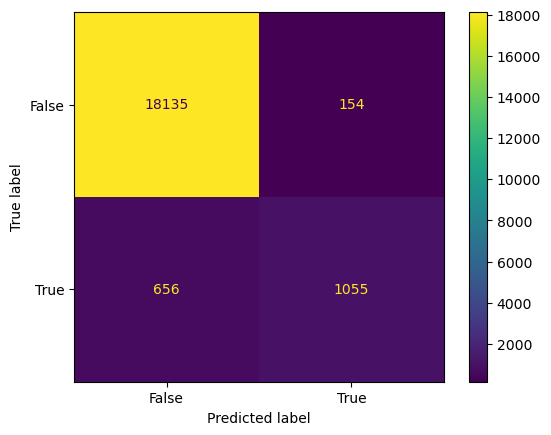

Recall: 0.6165984804208066
Precision: 0.8726220016542597
AUC score: 0.9608418367876832


In [51]:
model_log2 = LogisticRegression(C=0.8).fit(X_train_noout, y_train_noout)
evaulation(y_test, model_log2.predict(X_test))
auc_print(y_test, model_log2.predict_proba(X_test)[:,1])
resultsLogistic=pd.concat([resultsLogistic, resultsDataFrame(y_test,model_log2.predict(X_test), model_log2.predict_proba(X_test)[:,1], 'No out')], axis=1)

In [52]:
gridBoost.fit(X_train_noout, y_train_noout)
print(gridBoost.best_params_)

{'learning_rate': 0.2, 'n_estimators': 70}


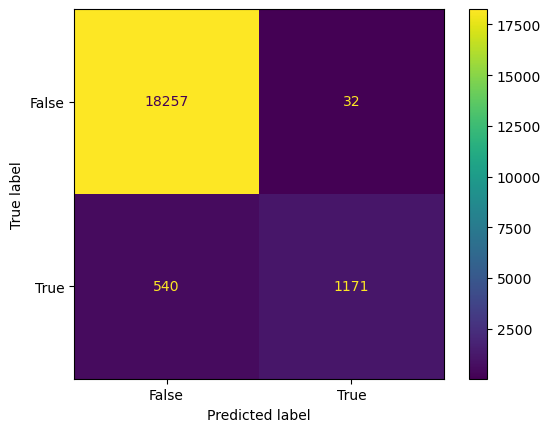

Recall: 0.684395090590298
Precision: 0.9733998337489609
AUC score: 0.9782473449930253


In [53]:
model_boost2 = GradientBoostingClassifier(learning_rate=0.2, n_estimators=70).fit(X_train_noout, y_train_noout)
evaulation(y_test, model_boost2.predict(X_test))
auc_print(y_test, model_boost2.predict_proba(X_test)[:,1])
resultsBoost=pd.concat([resultsBoost, resultsDataFrame(y_test,model_boost2.predict(X_test), model_boost2.predict_proba(X_test)[:,1], 'No out')], axis=1)

## Poly dataset

In [54]:
gridTree.fit(X_train_poly, y_train_poly)
print(gridTree.best_params_)

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}


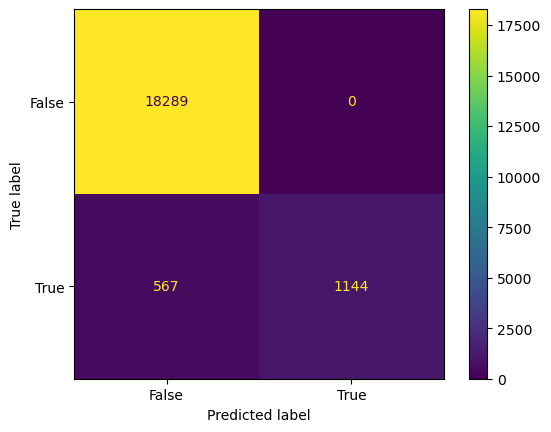

Recall: 0.668614845119813
Precision: 1.0
AUC score: 0.9674496705741977


In [55]:
model_tree3 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=2).fit(X_train_poly, y_train_poly)
evaulation(y_test_poly, model_tree3.predict(X_test_poly))
auc_print(y_test_poly, model_tree3.predict_proba(X_test_poly)[:,1])
resultsTree=pd.concat([resultsTree, resultsDataFrame(y_test_poly,model_tree3.predict(X_test_poly), model_tree3.predict_proba(X_test_poly)[:,1], 'Poly')], axis=1)

In [56]:
gridKNN.fit(X_train_poly, y_train_poly)
print(gridKNN.best_params_)

{'n_neighbors': 31}


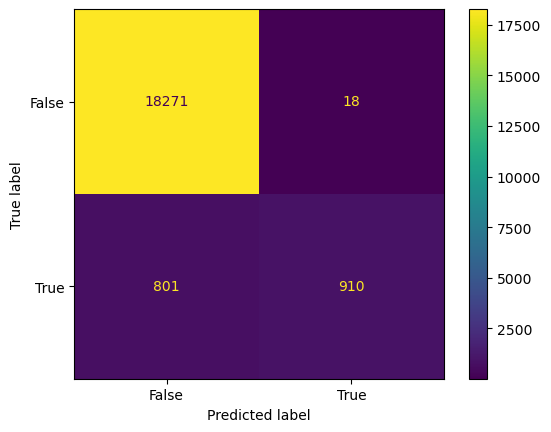

Recall: 0.5318527177089422
Precision: 0.9806034482758621
AUC score: 0.9527817051503014


In [57]:
model_knn3 = KNeighborsClassifier(n_neighbors=31).fit(X_train_poly, y_train_poly)
evaulation(y_test_poly, model_knn3.predict(X_test_poly))
auc_print(y_test_poly, model_knn3.predict_proba(X_test_poly)[:,1])
resultsKNN=pd.concat([resultsKNN, resultsDataFrame(y_test_poly,model_knn3.predict(X_test_poly), model_knn3.predict_proba(X_test_poly)[:,1], 'Poly')], axis=1)

In [58]:
gridLogistic.fit(X_train_poly, y_train_poly)
print(gridLogistic.best_params_)

{'C': 0.1}


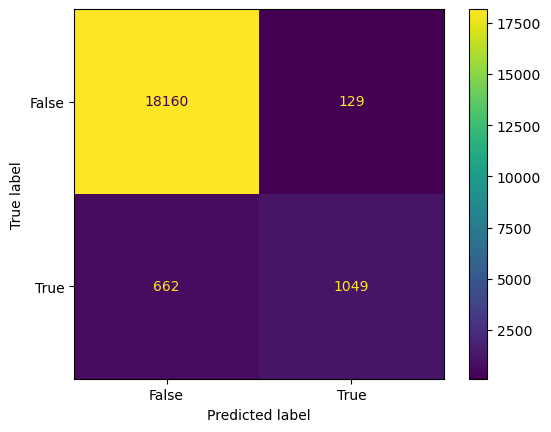

Recall: 0.6130917592051431
Precision: 0.8904923599320883
AUC score: 0.9605356929375906


In [59]:
model_log3 = LogisticRegression(C=0.1).fit(X_train_poly, y_train_poly)
evaulation(y_test_poly, model_log3.predict(X_test_poly))
auc_print(y_test_poly, model_log3.predict_proba(X_test_poly)[:,1])
resultsLogistic=pd.concat([resultsLogistic, resultsDataFrame(y_test_poly,model_log3.predict(X_test_poly), model_log3.predict_proba(X_test_poly)[:,1], 'Poly')], axis=1)

In [60]:
gridBoost.fit(X_train_poly, y_train_poly)
print(gridBoost.best_params_)

{'learning_rate': 0.2, 'n_estimators': 100}


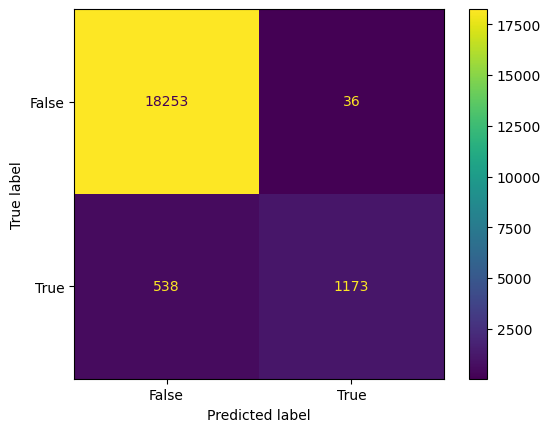

Recall: 0.6855639976621859
Precision: 0.9702233250620348
AUC score: 0.9780641859662189


In [61]:
model_boost3 = GradientBoostingClassifier(learning_rate=0.2, n_estimators=100).fit(X_train_poly, y_train_poly)
evaulation(y_test_poly, model_boost3.predict(X_test_poly))
auc_print(y_test_poly, model_boost3.predict_proba(X_test_poly)[:,1])
resultsBoost=pd.concat([resultsBoost, resultsDataFrame(y_test_poly,model_boost3.predict(X_test_poly), model_boost3.predict_proba(X_test_poly)[:,1], 'Poly')], axis=1)

## Selected dataset

In [62]:
gridTree.fit(X_train_sel, y_train_sel)
print(gridTree.best_params_)

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 5}


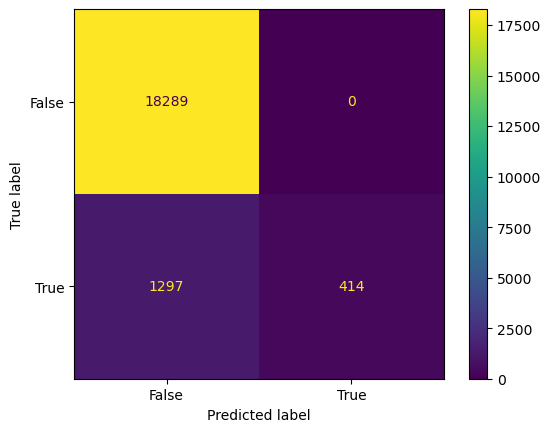

Recall: 0.24196376388077148
Precision: 1.0
AUC score: 0.8778622971992727


In [63]:
model_tree4 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=2).fit(X_train_sel, y_train_sel)
evaulation(y_test_sel, model_tree4.predict(X_test_sel))
auc_print(y_test_sel, model_tree4.predict_proba(X_test_sel)[:,1])
resultsTree=pd.concat([resultsTree, resultsDataFrame(y_test_sel,model_tree4.predict(X_test_sel), model_tree4.predict_proba(X_test_sel)[:,1], 'Selected')], axis=1)

In [64]:
gridKNN.fit(X_train_sel, y_train_sel)
print(gridKNN.best_params_)

{'n_neighbors': 31}


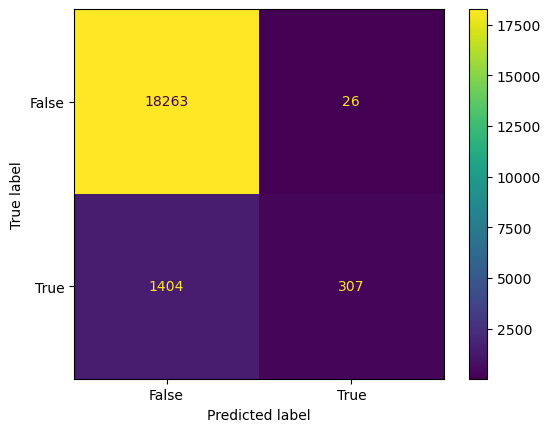

Recall: 0.179427235534775
Precision: 0.9219219219219219
AUC score: 0.853706844382639


In [65]:
model_knn4 = KNeighborsClassifier(n_neighbors=31).fit(X_train_sel, y_train_sel)
evaulation(y_test_sel, model_knn4.predict(X_test_sel))
auc_print(y_test_sel, model_knn4.predict_proba(X_test_sel)[:,1])
resultsKNN=pd.concat([resultsKNN, resultsDataFrame(y_test_sel,model_knn4.predict(X_test_sel), model_knn4.predict_proba(X_test_sel)[:,1], 'Selected')], axis=1)

In [66]:
gridLogistic.fit(X_train_sel, y_train_sel)
print(gridLogistic.best_params_)

{'C': 0.2}


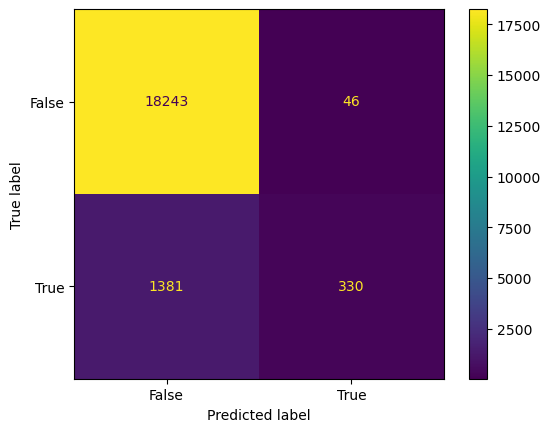

Recall: 0.19286966686148452
Precision: 0.8776595744680851
AUC score: 0.8716121212384611


In [67]:
model_log4 = LogisticRegression(C=0.2).fit(X_train_sel, y_train_sel)
evaulation(y_test_sel, model_log4.predict(X_test_sel))
auc_print(y_test_sel, model_log4.predict_proba(X_test_sel)[:,1])
resultsLogistic=pd.concat([resultsLogistic, resultsDataFrame(y_test_sel,model_log4.predict(X_test_sel), model_log4.predict_proba(X_test_sel)[:,1], 'Selected')], axis=1)

In [68]:
gridBoost.fit(X_train_sel, y_train_sel)
print(gridBoost.best_params_)

{'learning_rate': 0.1, 'n_estimators': 100}


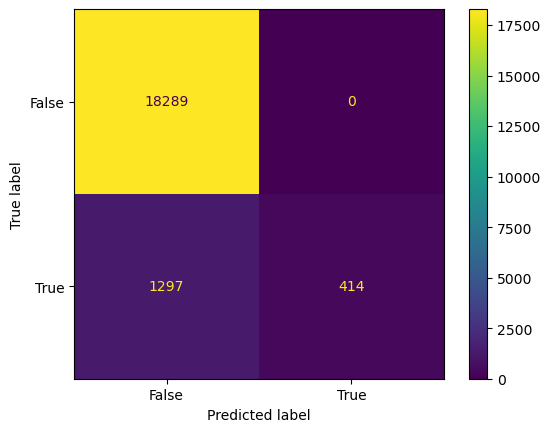

Recall: 0.24196376388077148
Precision: 1.0
AUC score: 0.8849540651605134


In [69]:
model_boost4 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100).fit(X_train_sel, y_train_sel)
evaulation(y_test_sel, model_boost4.predict(X_test_sel))
auc_print(y_test_sel, model_boost4.predict_proba(X_test_sel)[:,1])
resultsBoost=pd.concat([resultsBoost, resultsDataFrame(y_test_sel,model_boost4.predict(X_test_sel), model_boost4.predict_proba(X_test_sel)[:,1], 'Selected')], axis=1)

In [70]:
resultsTree

,Basic,No out,Poly,Selected
AUC,0.9618,0.9619,0.9674,0.8779
Precision,1.0000,1.0000,1.0000,1.0000
Recall,0.6686,0.6686,0.6686,0.2420


In [71]:
resultsKNN

,Basic,No out,Poly,Selected
AUC,0.9618,0.9531,0.9528,0.8537
Precision,1.0000,0.9808,0.9806,0.9219
Recall,0.6686,0.5365,0.5319,0.1794


In [72]:
resultsLogistic

,Basic,No out,Poly,Selected
AUC,0.9618,0.9608,0.9605,0.8716
Precision,1.0000,0.8726,0.8905,0.8777
Recall,0.6686,0.6166,0.6131,0.1929


In [73]:
resultsBoost

,Basic,No out,Poly,Selected
AUC,0.9618,0.9782,0.9781,0.885
Precision,1.0000,0.9734,0.9702,1.000
Recall,0.6686,0.6844,0.6856,0.242


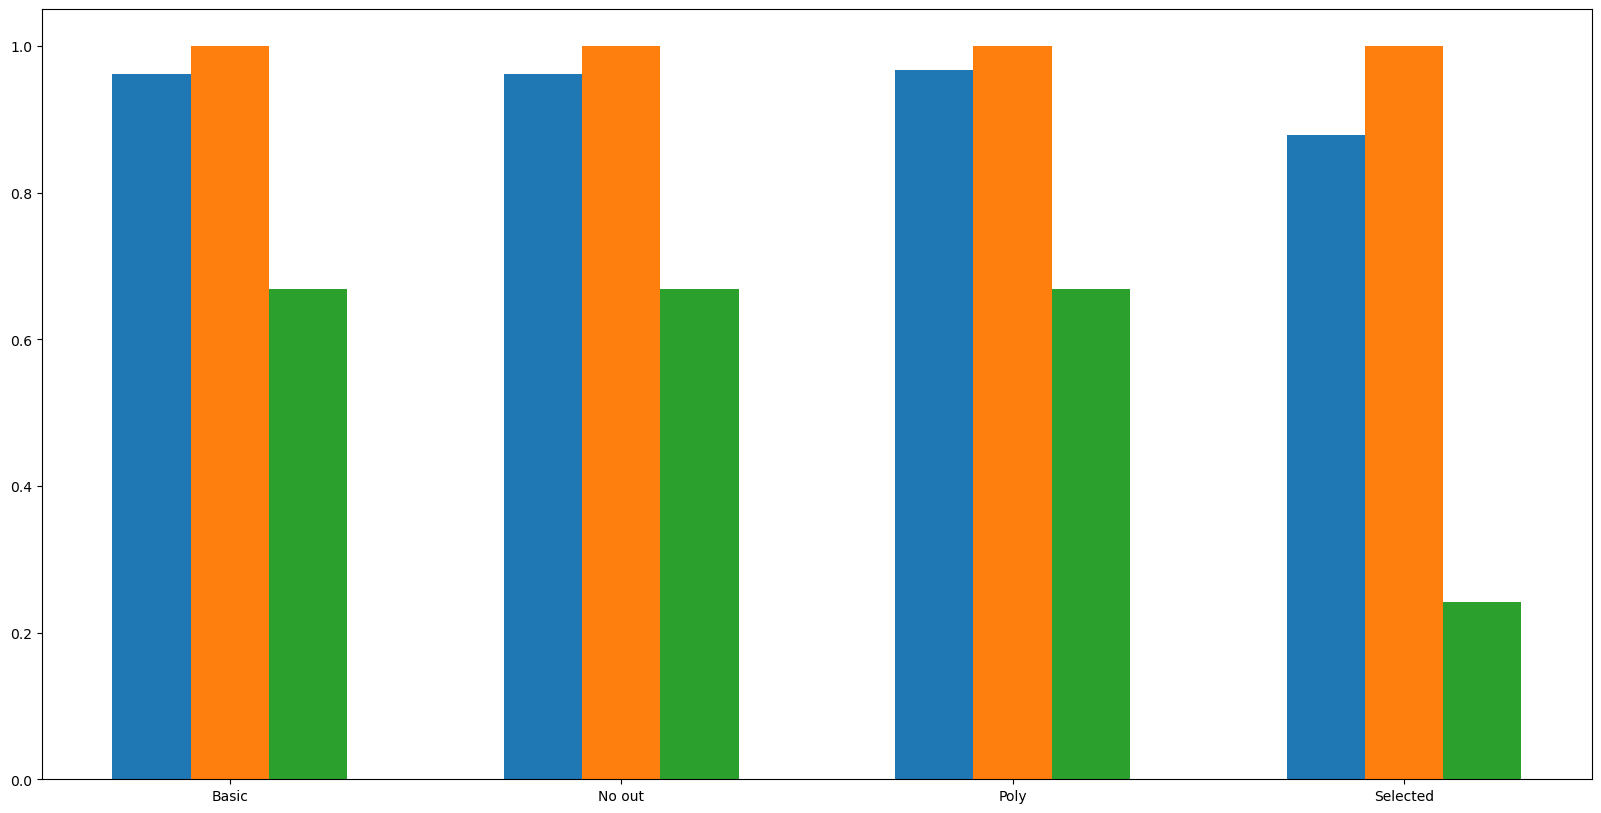

In [74]:
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
for i, row in enumerate(resultsTree.values):
    x = [p + i * 0.2 for p in range(len(resultsTree.columns))]
    ax.bar(x, row, width=0.2, label=f'Red {i+1}')
ax.set_xticks([p + 0.2 for p in range(len(resultsTree.columns))])
ax.set_xticklabels(resultsTree.columns)
plt.show()


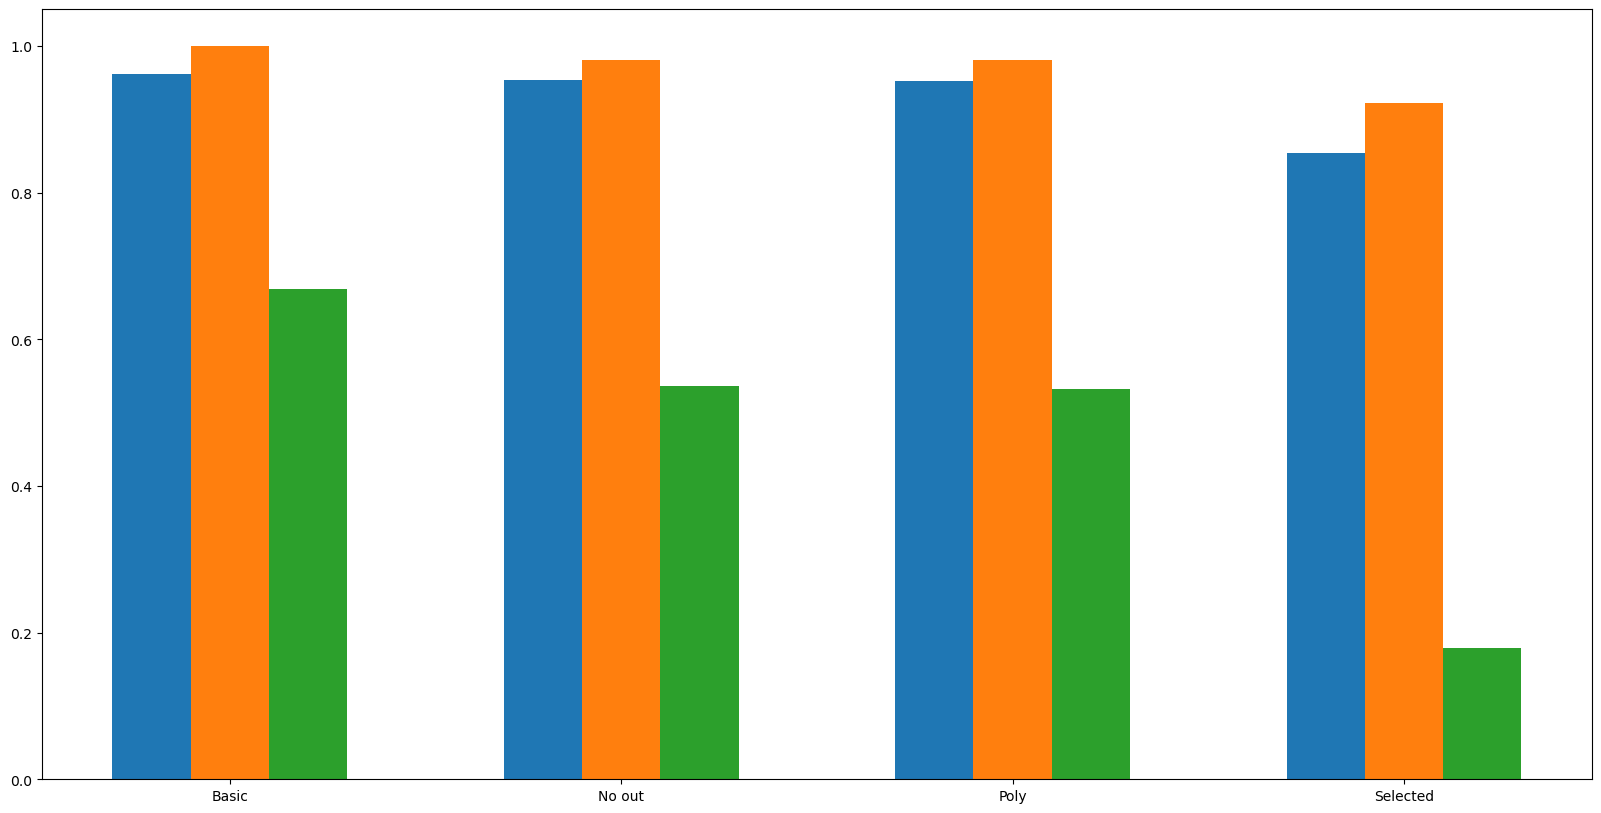

In [75]:
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
for i, row in enumerate(resultsKNN.values):
    x = [p + i * 0.2 for p in range(len(resultsKNN.columns))]
    ax.bar(x, row, width=0.2, label=f'Red {i+1}')
ax.set_xticks([p + 0.2 for p in range(len(resultsKNN.columns))])
ax.set_xticklabels(resultsKNN.columns)
plt.show()

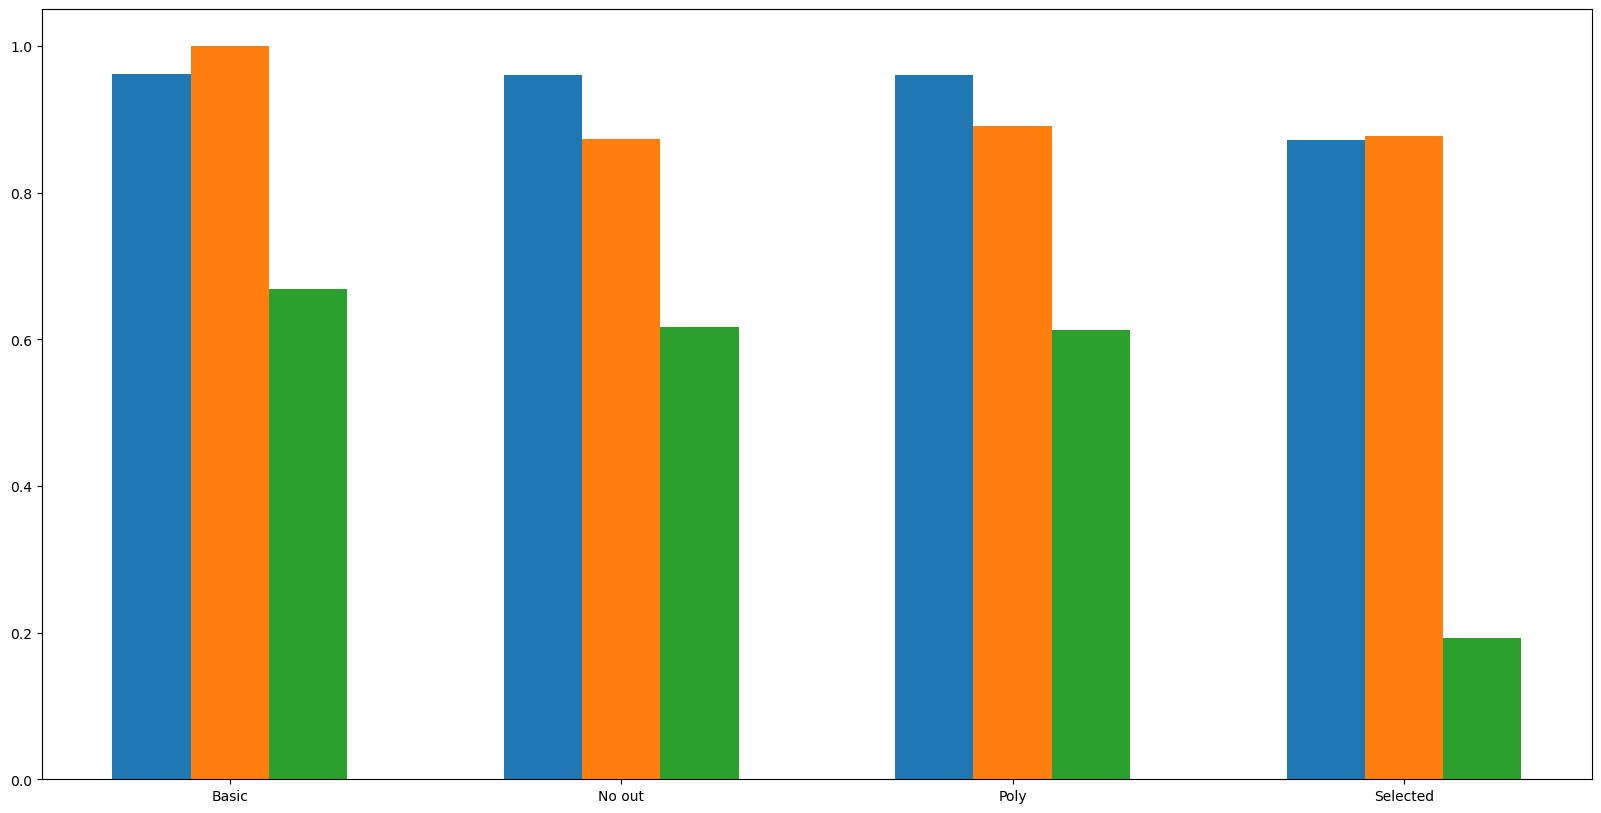

In [76]:
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
for i, row in enumerate(resultsLogistic.values):
    x = [p + i * 0.2 for p in range(len(resultsLogistic.columns))]
    ax.bar(x, row, width=0.2, label=f'Red {i+1}')
ax.set_xticks([p + 0.2 for p in range(len(resultsLogistic.columns))])
ax.set_xticklabels(resultsLogistic.columns)
plt.show()


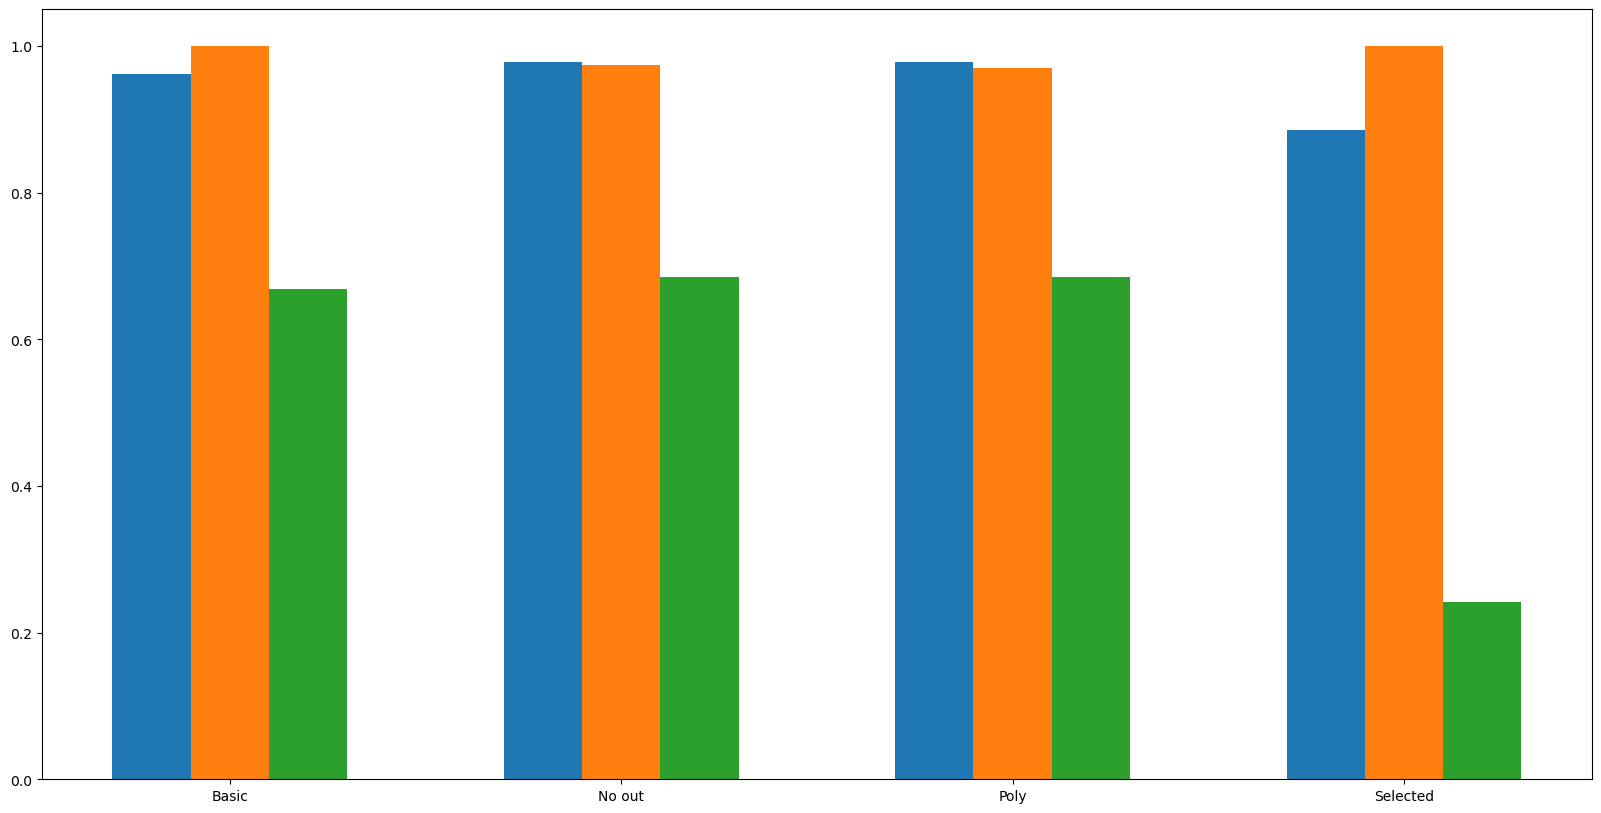

In [77]:
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
for i, row in enumerate(resultsBoost.values):
    x = [p + i * 0.2 for p in range(len(resultsBoost.columns))]
    ax.bar(x, row, width=0.2, label=f'Red {i+1}')
ax.set_xticks([p + 0.2 for p in range(len(resultsBoost.columns))])
ax.set_xticklabels(resultsBoost.columns)
plt.show()

As we can see, selection has not payed off, because every model has bad results for selected dataset. Also another thing that is clear is that precision is very high. The reason for that is that we dont have much gusses for positive class due to very big class imbalance in this dataset. So focus should be on finding the model who has good recall. We can see that DecisionTree and GradinetBoosting both have good scores for AUC and recall, so we can use them in next analysis which will be threshold change. Because we want to have better recall and for that we will give up on precision, we will lower the threshold so we can make changes in their balance.

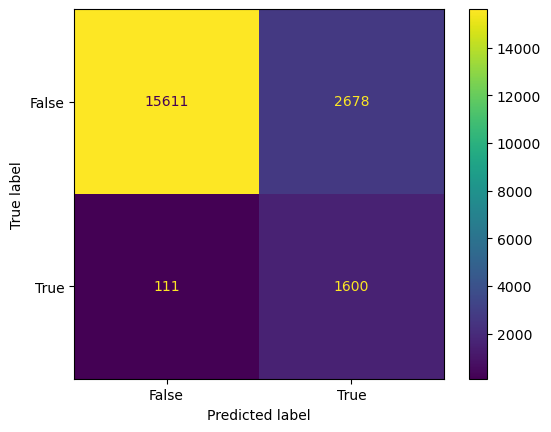

Recall: 0.9351256575102279
Precision: 0.3740065451145395
---------------------------------------------


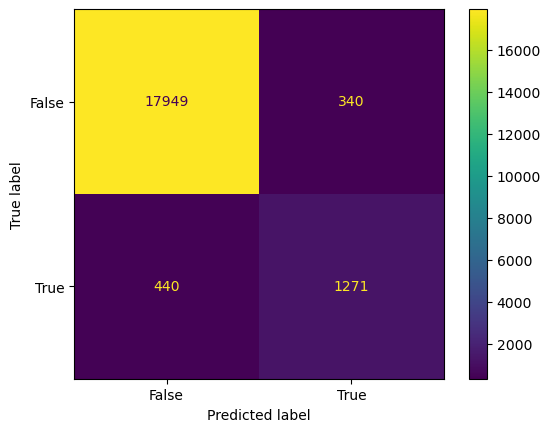

Recall: 0.7428404441846873
Precision: 0.7889509621353197
---------------------------------------------


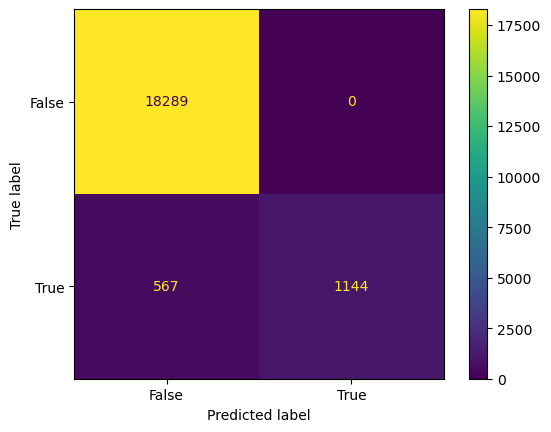

Recall: 0.668614845119813
Precision: 1.0
---------------------------------------------


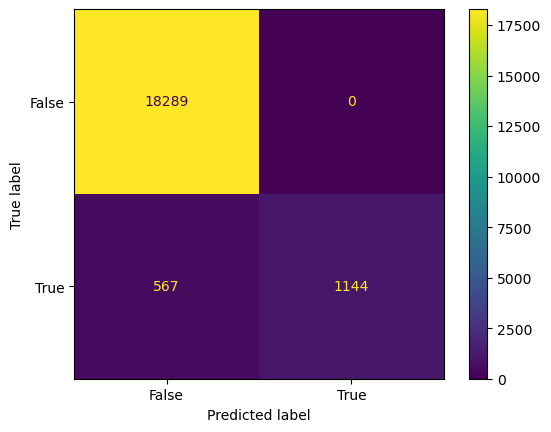

Recall: 0.668614845119813
Precision: 1.0
---------------------------------------------


In [78]:
for th in [0.1,0.2,0.3,0.4]:
    evaulation(y_test, model_tree1.predict_proba(X_test)[:,1]>=th)
    print('---------------------------------------------')

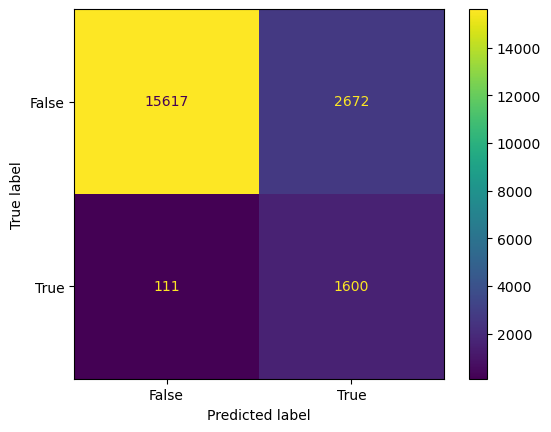

Recall: 0.9351256575102279
Precision: 0.37453183520599254
---------------------------------------------


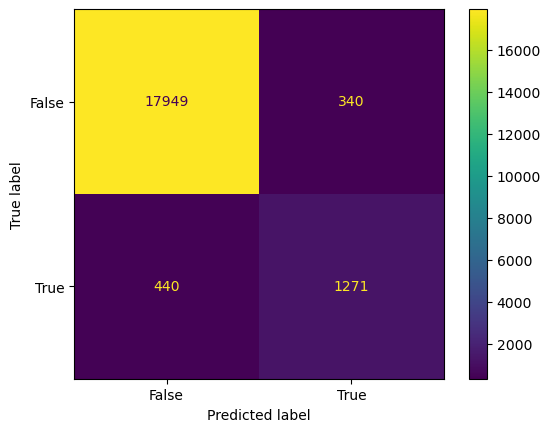

Recall: 0.7428404441846873
Precision: 0.7889509621353197
---------------------------------------------


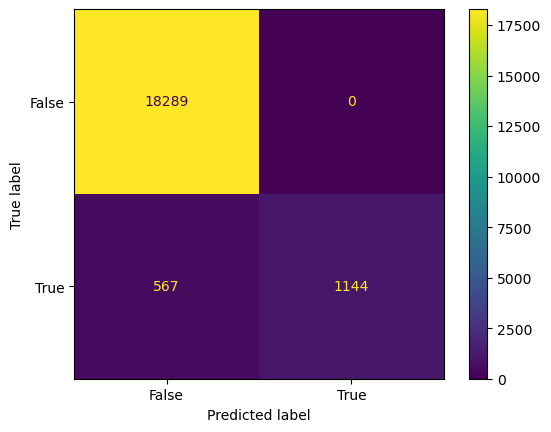

Recall: 0.668614845119813
Precision: 1.0
---------------------------------------------


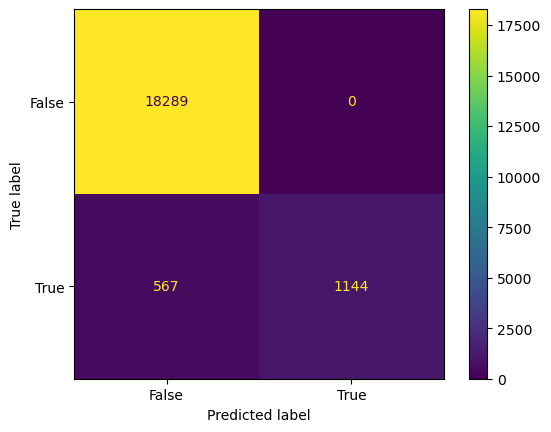

Recall: 0.668614845119813
Precision: 1.0
---------------------------------------------


In [79]:
for th in [0.1,0.2,0.3,0.4]:
    evaulation(y_test, model_tree2.predict_proba(X_test)[:,1]>=th)
    print('---------------------------------------------')

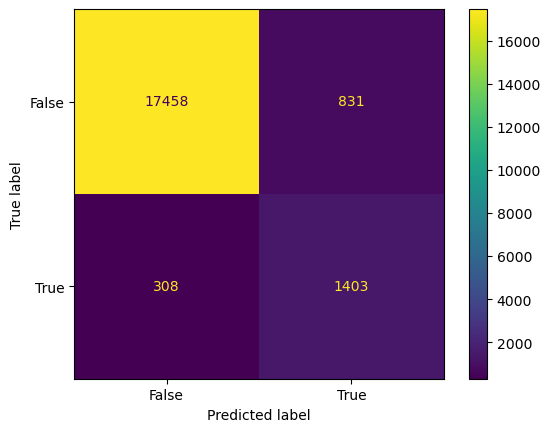

Recall: 0.8199883109292812
Precision: 0.6280214861235452
---------------------------------------------


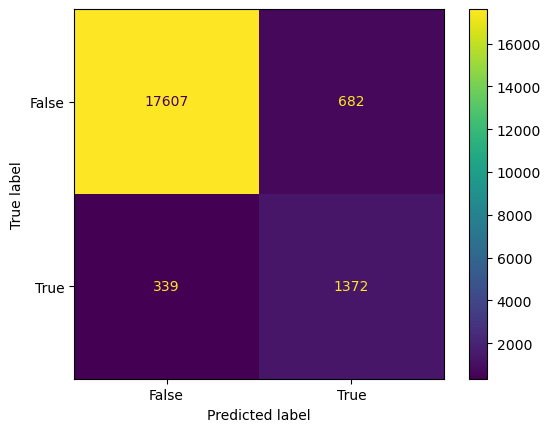

Recall: 0.8018702513150204
Precision: 0.667964946445959
---------------------------------------------


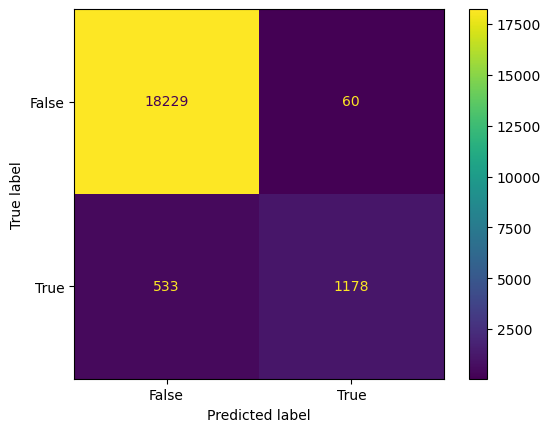

Recall: 0.6884862653419053
Precision: 0.9515347334410339
---------------------------------------------


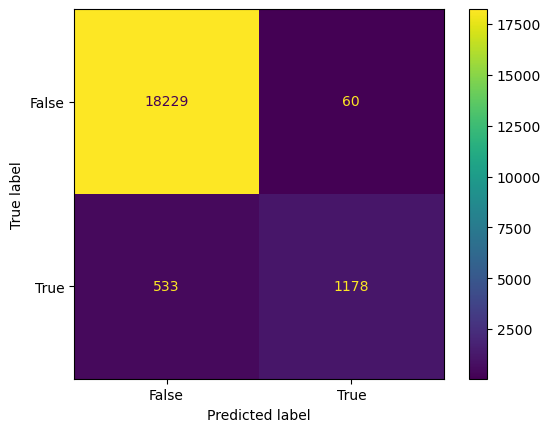

Recall: 0.6884862653419053
Precision: 0.9515347334410339
---------------------------------------------


In [80]:
for th in [0.1,0.2,0.3,0.4]:
    evaulation(y_test_poly, model_tree3.predict_proba(X_test_poly)[:,1]>=th)
    print('---------------------------------------------')

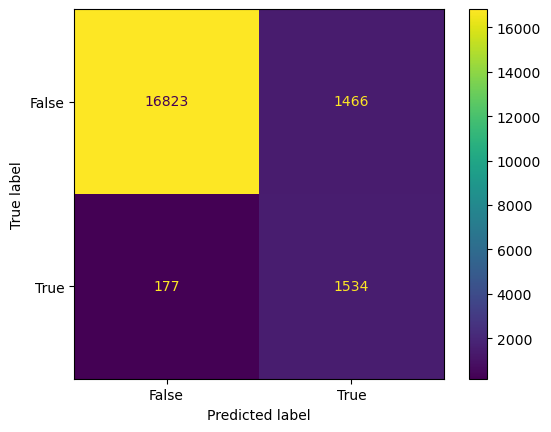

Recall: 0.896551724137931
Precision: 0.5113333333333333
---------------------------------------------


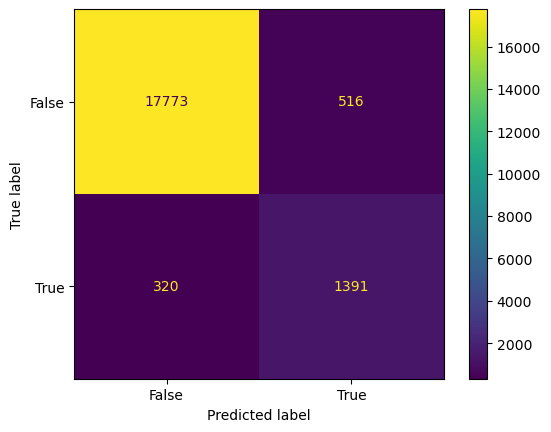

Recall: 0.8129748684979544
Precision: 0.729417933927635
---------------------------------------------


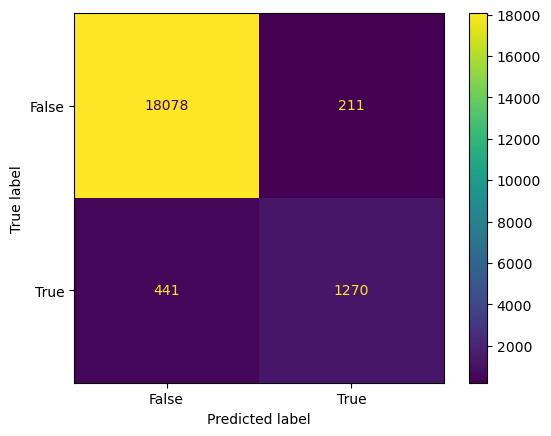

Recall: 0.7422559906487435
Precision: 0.8575286968264686
---------------------------------------------


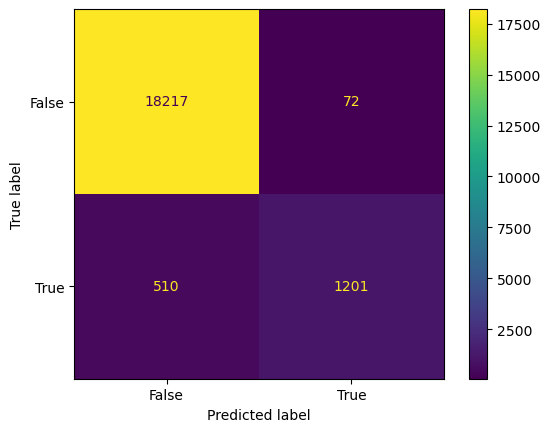

Recall: 0.7019286966686148
Precision: 0.94344069128044
---------------------------------------------


In [81]:
for th in [0.1,0.2,0.3,0.4]:
    evaulation(y_test, model_boost1.predict_proba(X_test)[:,1]>=th)
    print('---------------------------------------------')

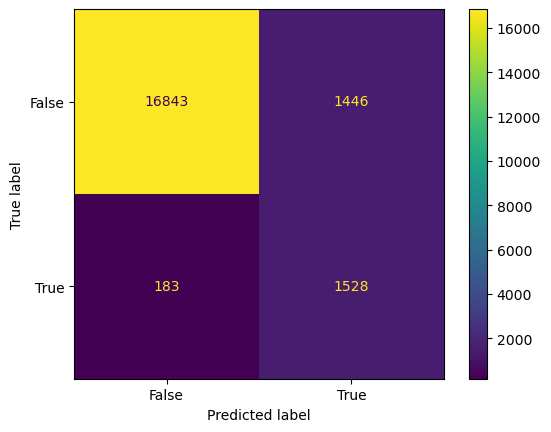

Recall: 0.8930450029222676
Precision: 0.5137861466039004
---------------------------------------------


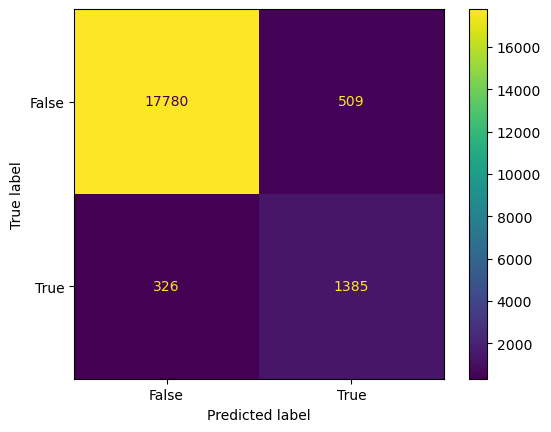

Recall: 0.8094681472822911
Precision: 0.7312565997888067
---------------------------------------------


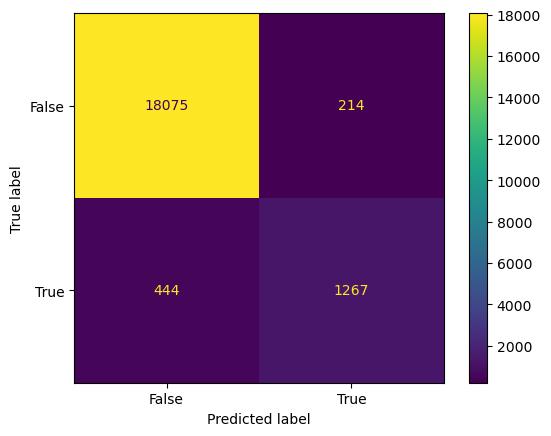

Recall: 0.7405026300409118
Precision: 0.8555030384875084
---------------------------------------------


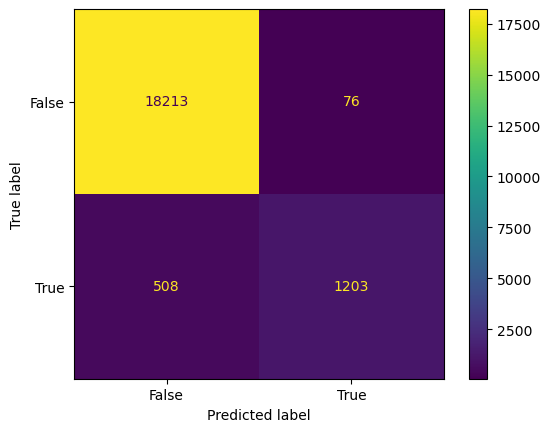

Recall: 0.7030976037405027
Precision: 0.9405785770132916
---------------------------------------------


In [82]:
for th in [0.1,0.2,0.3,0.4]:
    evaulation(y_test, model_boost2.predict_proba(X_test)[:,1]>=th)
    print('---------------------------------------------')

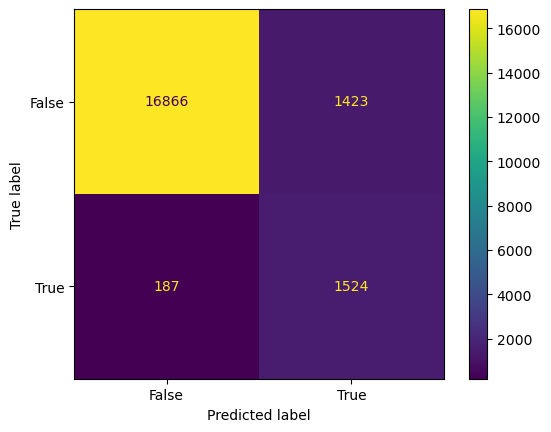

Recall: 0.8907071887784921
Precision: 0.5171360705802511
---------------------------------------------


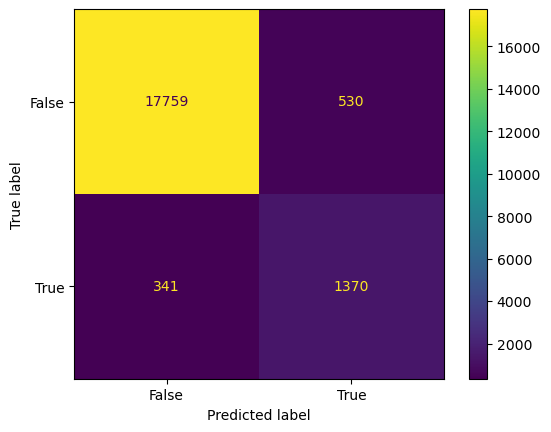

Recall: 0.8007013442431327
Precision: 0.7210526315789474
---------------------------------------------


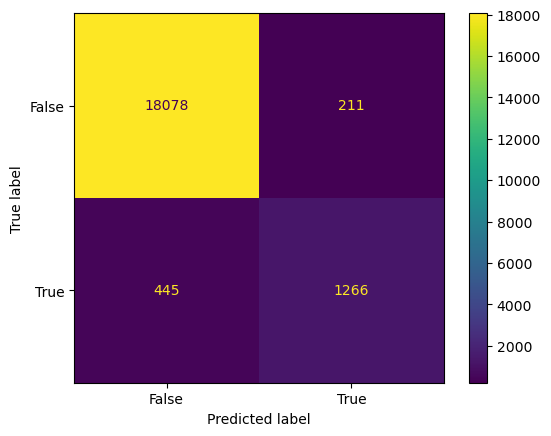

Recall: 0.7399181765049678
Precision: 0.8571428571428571
---------------------------------------------


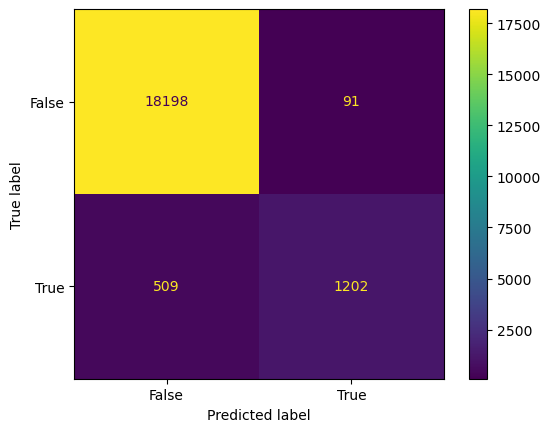

Recall: 0.7025131502045587
Precision: 0.9296210363495746
---------------------------------------------


In [83]:
for th in [0.1,0.2,0.3,0.4]:
    evaulation(y_test_poly, model_boost3.predict_proba(X_test_poly)[:,1]>=th)
    print('---------------------------------------------')

As we can see, moving threshold from 0.5 to lower value will result more balance between recall and precision. Because it is more important to catch people with diabetes than people without diabetes, we will be focusing on choosing higher recall. From this models we can see that the best fit for the threshold is 0.2 and the optimal model so far is GradientBoosting on basic dataset.

In [84]:
best_model=model_boost1

Just out of curiosity, we will see all basic metrics for this model.

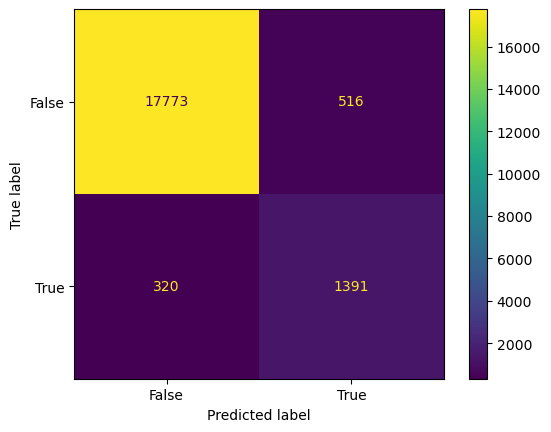

Recall: 0.8129748684979544
Precision: 0.729417933927635
Accuracy: 0.9582
F1: 0.7689331122166942
FPR: 0.9717863196456886
AUC score: 0.8923805940718215


In [85]:
from sklearn.metrics import accuracy_score, f1_score
evaulation(y_test, model_boost1.predict_proba(X_test)[:,1]>=0.2)
print(f'Accuracy: {accuracy_score(y_test, model_boost1.predict_proba(X_test)[:,1]>=0.2)}')
print(f'F1: {f1_score(y_test, model_boost1.predict_proba(X_test)[:,1]>=0.2)}')
print(f'FPR: {recall_score(y_test, model_boost1.predict_proba(X_test)[:,1]>=0.2, pos_label=0)}')
auc_print(y_test, model_boost1.predict_proba(X_test)[:,1]>=0.2)